In [ ]:
ort numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
!pip install split-folders
import pandas as pd
import numpy as np
import os
import cv2
import splitfolders
import glob as gb
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!unzip archive\ \(13\).zip

In [ ]:
import os
dataset_path='/content/Grapevine_Leaves_Image_Dataset/'
categories=os.listdir(dataset_path)
print("Available categories:")
for category in categories:
  if os.path.isdir(os.path.join(dataset_path,category)):
    print(category)

Available categories:
Ak
Buzgulu
Ala_Idris
Dimnit
Nazli


In [ ]:
for folder in os.listdir(dataset_path):
    folder_path=os.path.join(dataset_path,folder)
    if os.path.isdir(folder_path):
        list_of_elements = os.listdir(os.path.join(dataset_path,folder))
            #files = gb.glob(pathname= str(path_main + folder +"/*.png"))
        print(f"Number of elements , found {len(list_of_elements)} in folder {folder}")

    else:
        print(f"{folder_path} is not a directory")

Number of elements , found 100 in folder Ak
Number of elements , found 100 in folder Buzgulu
Number of elements , found 100 in folder Ala_Idris
/content/Grapevine_Leaves_Image_Dataset/Grapevine_Leaves_Image_Dataset_Citation_Request.txt is not a directory
Number of elements , found 100 in folder Dimnit
Number of elements , found 100 in folder Nazli


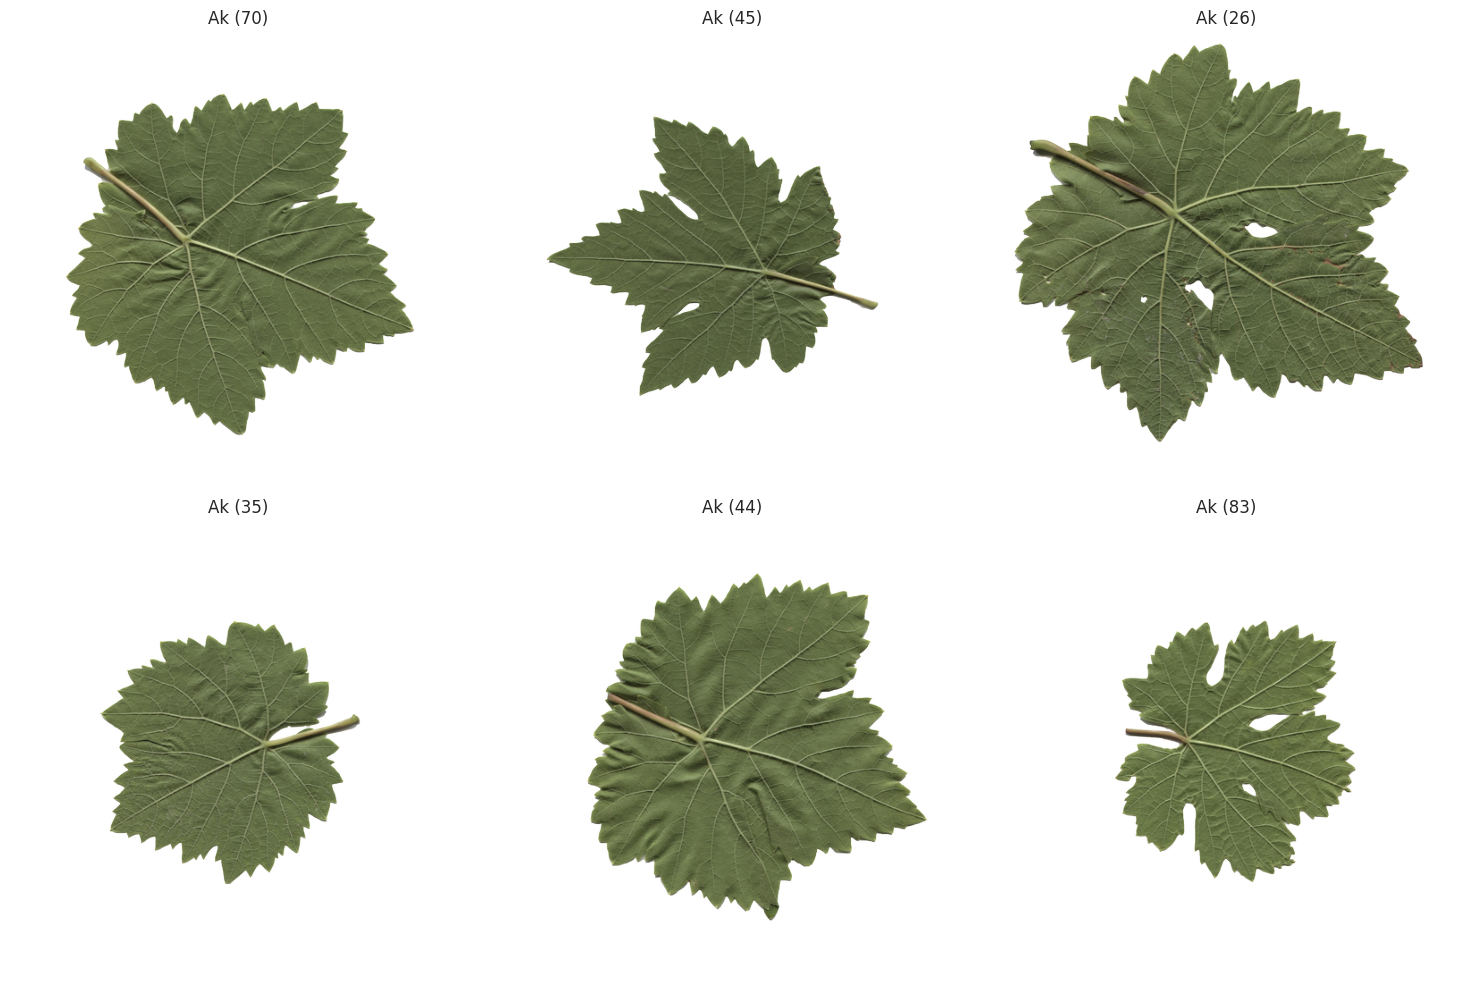

In [ ]:
path = '/content/Grapevine_Leaves_Image_Dataset/Ak'
image_files=[f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]

fig,axs=plt.subplots(2,3,figsize=(15,10))

for i in range(6):
  image_file=image_files[i]
  label=image_file.split('.')[0]

  img_path=os.path.join(path,image_file)
  img=mpimg.imread(img_path)
  x = axs[i // 3, i % 3]
  x.imshow(img)
  x.axis('off')
  x.set_title(label)

plt.tight_layout()
plt.show()

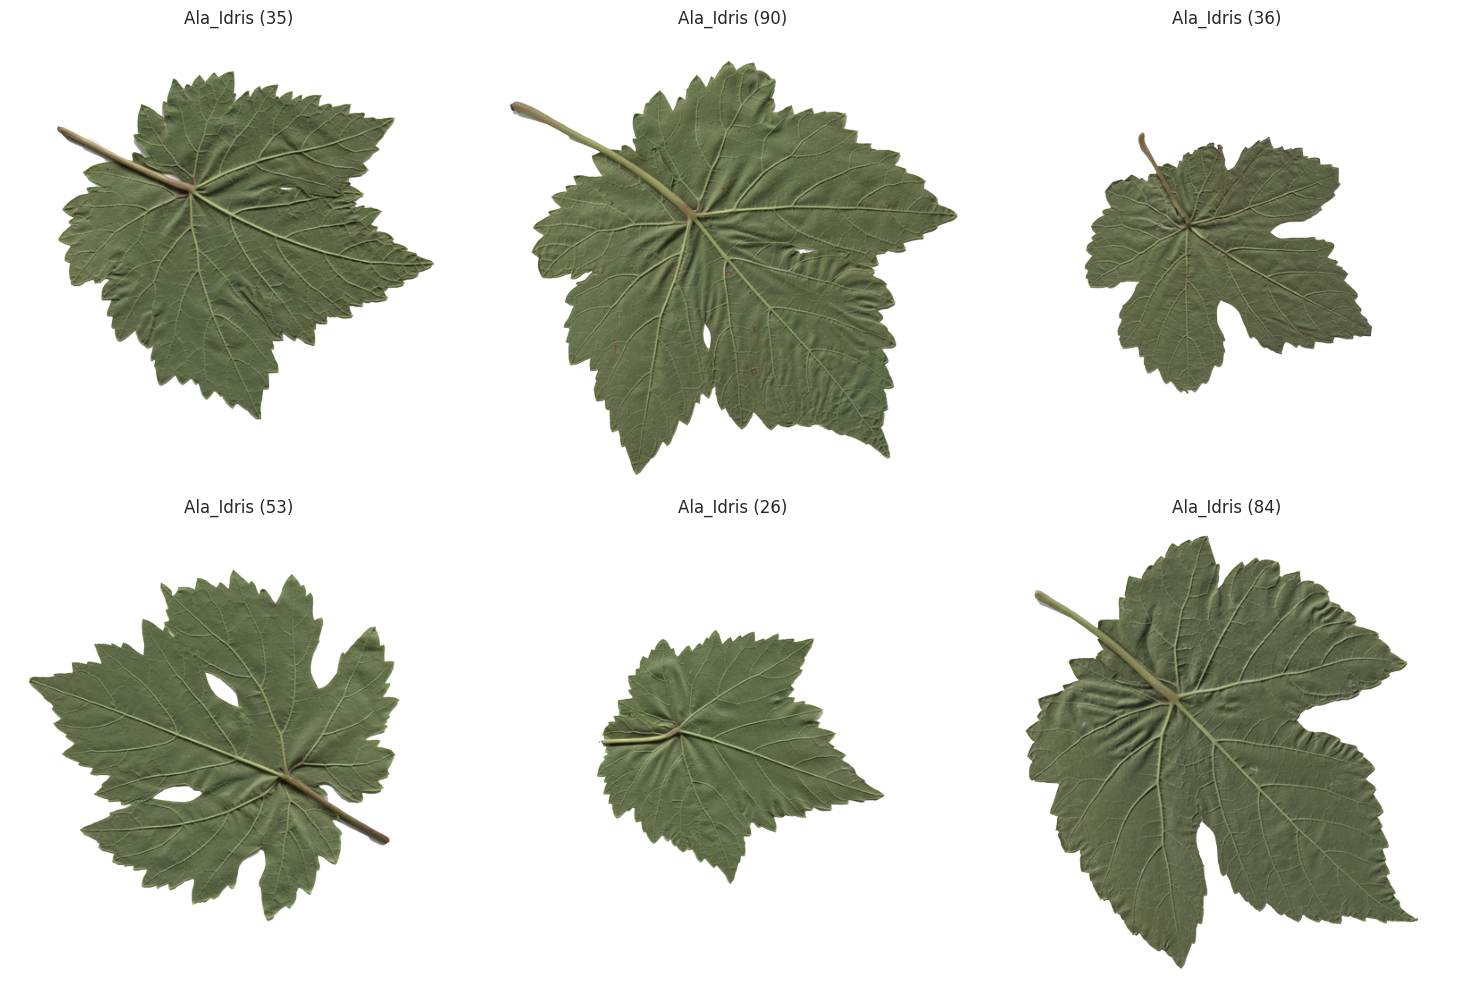

In [ ]:
path = '/content/Grapevine_Leaves_Image_Dataset/Ala_Idris'
image_files=[f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]

fig,axs=plt.subplots(2,3,figsize=(15,10))

for i in range(6):
  image_file=image_files[i]
  label=image_file.split('.')[0]

  img_path=os.path.join(path,image_file)
  img=mpimg.imread(img_path)
  x = axs[i // 3, i % 3]
  x.imshow(img)
  x.axis('off')
  x.set_title(label)

plt.tight_layout()
plt.show()

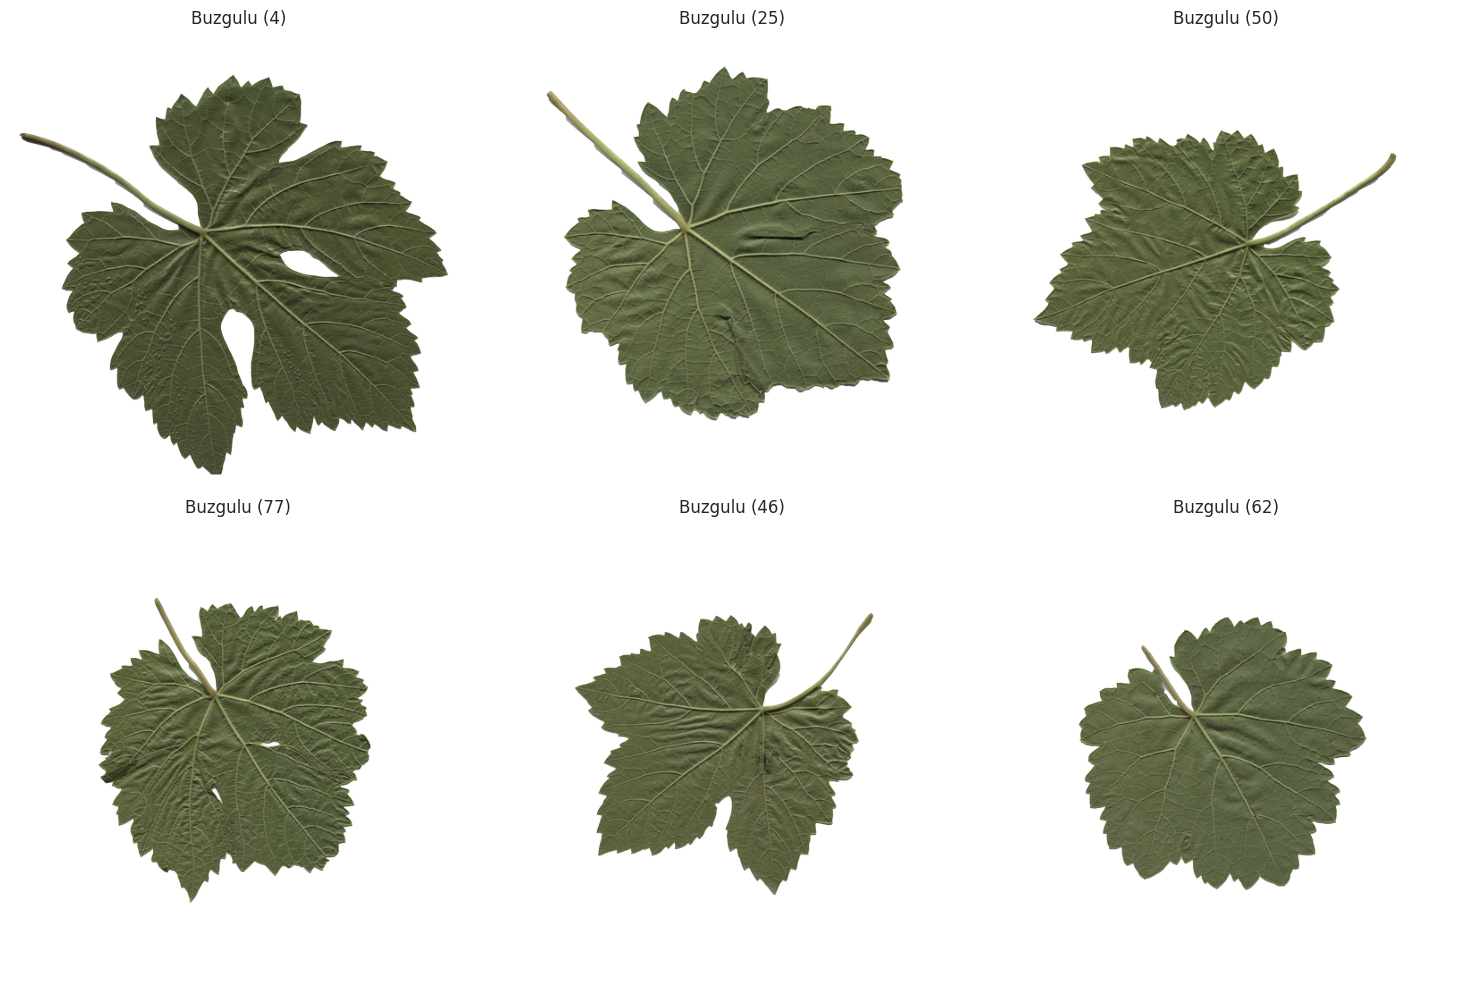

In [ ]:
path = '/content/Grapevine_Leaves_Image_Dataset/Buzgulu'
image_files=[f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]

fig,axs=plt.subplots(2,3,figsize=(15,10))

for i in range(6):
  image_file=image_files[i]
  label=image_file.split('.')[0]

  img_path=os.path.join(path,image_file)
  img=mpimg.imread(img_path)
  x = axs[i // 3, i % 3]
  x.imshow(img)
  x.axis('off')
  x.set_title(label)

plt.tight_layout()
plt.show()

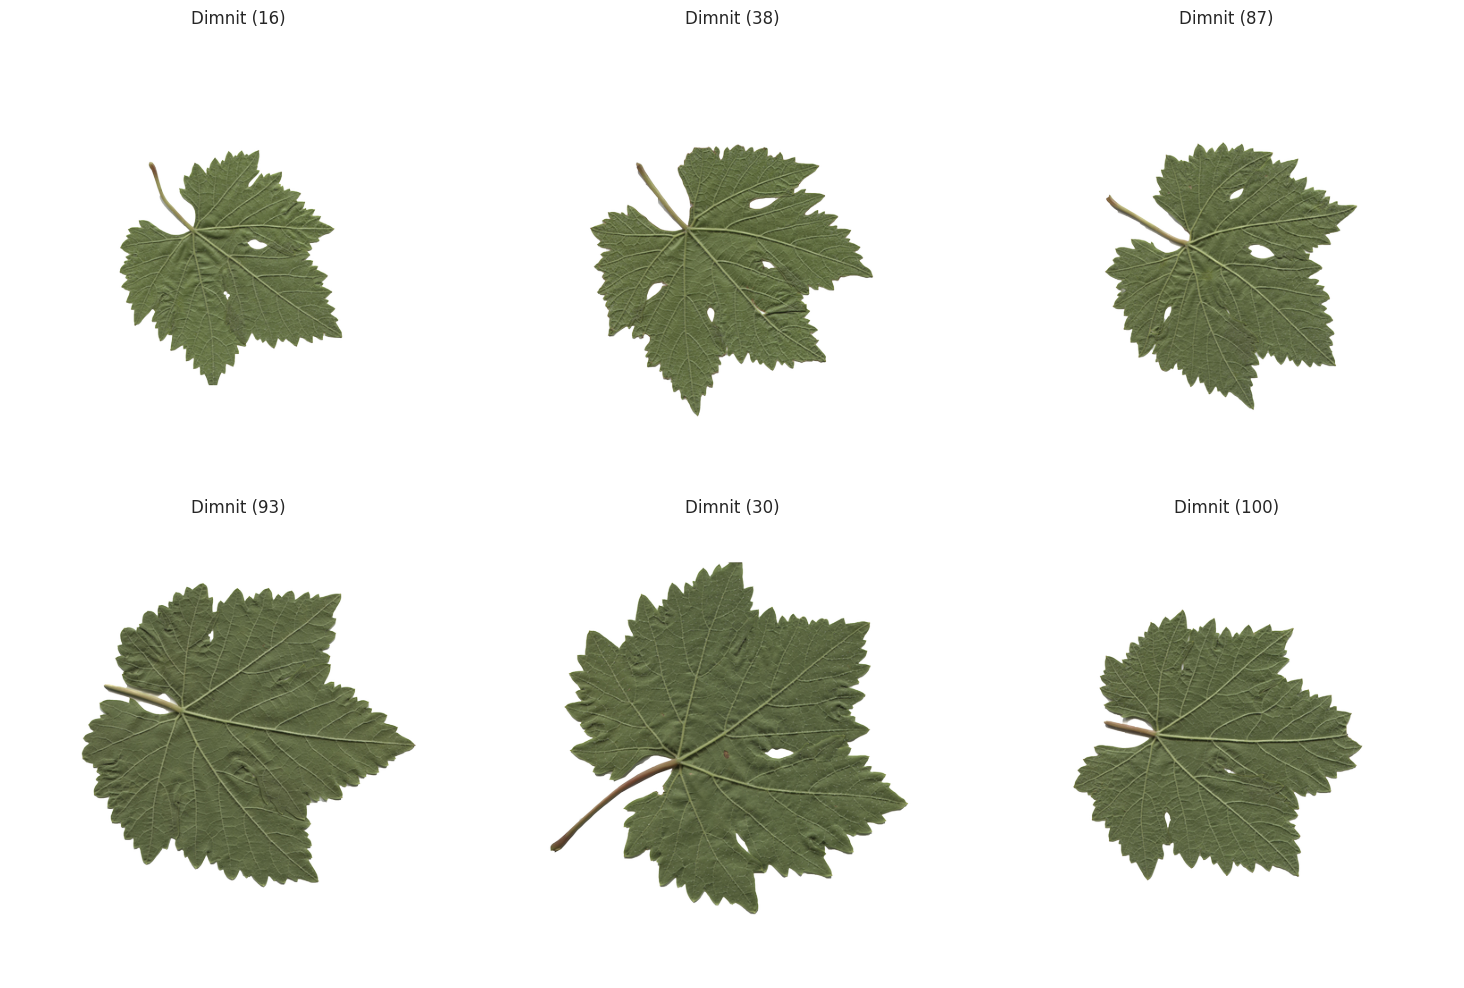

In [ ]:
path = '/content/Grapevine_Leaves_Image_Dataset/Dimnit'
image_files=[f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]

fig,axs=plt.subplots(2,3,figsize=(15,10))

for i in range(6):
  image_file=image_files[i]
  label=image_file.split('.')[0]

  img_path=os.path.join(path,image_file)
  img=mpimg.imread(img_path)
  x = axs[i // 3, i % 3]
  x.imshow(img)
  x.axis('off')
  x.set_title(label)

plt.tight_layout()
plt.show()

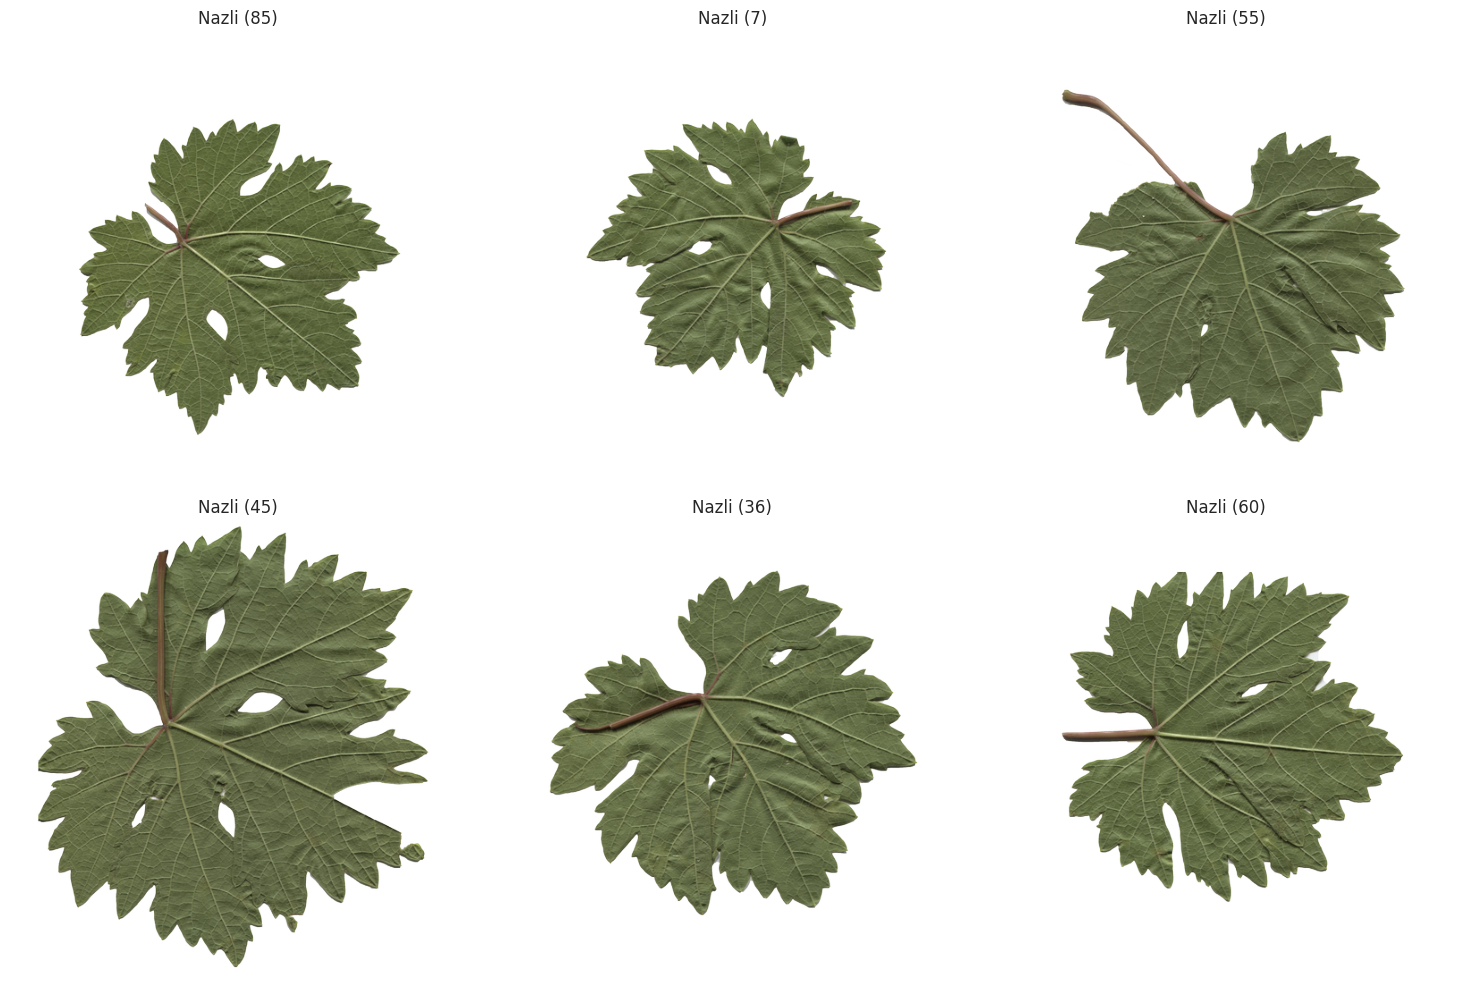

In [ ]:
path = '/content/Grapevine_Leaves_Image_Dataset/Nazli'
image_files=[f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]

fig,axs=plt.subplots(2,3,figsize=(15,10))

for i in range(6):
  image_file=image_files[i]
  label=image_file.split('.')[0]

  img_path=os.path.join(path,image_file)
  img=mpimg.imread(img_path)
  x = axs[i // 3, i % 3]
  x.imshow(img)
  x.axis('off')
  x.set_title(label)

plt.tight_layout()
plt.show()

In [ ]:
data_dir= '/content/Grapevine_Leaves_Image_Dataset'

print('Training Data')

train_ds=tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split= 0.2,
  subset='training',
  seed=123,
  image_size=(256,256),
  batch_size=32)

print('Validation Data')

validation_ds=tf.keras.utils.image_dataset_from_directory (
  data_dir,
  validation_split= 0.2,
  subset='validation',
  seed=123,
  image_size=(256,256),
  batch_size=32 )

Training Data
Found 500 files belonging to 5 classes.
Using 400 files for training.
Validation Data
Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [ ]:
def process(image,label):
    tf.cast(image/255,tf.float32)
    return image,label
train = train_ds.map(process)
test = validation_ds.map(process)

In [ ]:
for image, label in train.take(1):
    print(image.shape, label.shape)

(32, 256, 256, 3) (32,)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
dataset='/content/Grapevine_Leaves_Image_Dataset'

train=train_datagen.flow_from_directory(dataset,
                                       target_size=(200,200),
                                       color_mode="rgb",
                                       class_mode="categorical",
                                       batch_size=110)
valid_dataset = valid_datagen.flow_from_directory(dataset,
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  batch_size=110,
                                                  color_mode='rgb',
                                                  )
test=test_datagen.flow_from_directory(dataset,
                                     target_size=(200,200),
                                     color_mode="rgb",
                                     class_mode="categorical",
                                     batch_size=110)

Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
model=tf.keras.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),strides=(1,1),activation='relu',padding='same',input_shape=train.image_shape),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

  tf.keras.layers.Conv2D(64,(3,3),strides=(1,1),activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

  tf.keras.layers.Conv2D(128,(3,3),strides=(1,1),activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

  tf.keras.layers.Conv2D(256,(3,3),strides=(1,1),activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(5,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import keras
tf.keras.losses.CategoricalCrossentropy
METRICS=[

'accuracy',
keras.metrics.Precision(name='precision'),
keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,107,781 (19.48 MB)

 Trainable params: 5,107,781 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_fit=model.fit(train,validation_data=valid_dataset,epochs=10,verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 109s 22s/step - accuracy: 0.1713 - loss: 1.8669 - precision: 0.1307 - recall: 0.0214 - val_accuracy: 0.2000 - val_loss: 1.6087 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 94s 19s/step - accuracy: 0.1872 - loss: 1.6091 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2640 - val_loss: 1.6058 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 139s 20s/step - accuracy: 0.2565 - loss: 1.6061 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2740 - val_loss: 1.5983 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 112s 24s/step - accuracy: 0.2432 - loss: 1.6029 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.2820 - val_loss: 1.5922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 140s 23s/step - accuracy: 0.2992 - loss: 1.5900 - precision: 0.0000e+00 - recall: 0.0000

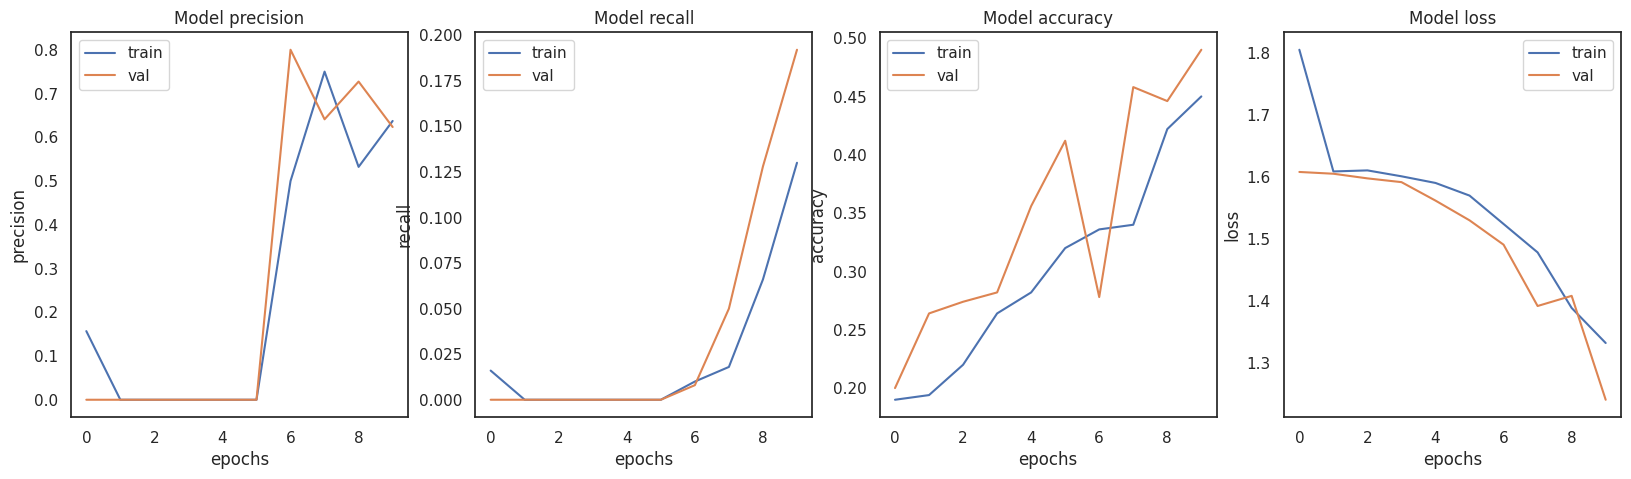

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(model_fit.history[met])
    ax[i].plot(model_fit.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])